### CSE-602 Supervised Machine Learning Project

### GROUP MEMBERS:
**AYESHA NOOR KHAN (ERP 29460)**

**MARYAM KHAN (ERP 08635)**

**PROJECT GOAL:**

The goal of the project is to identify an imbalance class dataset and make the possible solution for it using Class Balancing Solutions.

**CI SOLUTIONS AND CLASSIFIERS USED:**

In this dataset we will be covering three Class Imbalance Solution:

1.   Resampling Method (SMOTE)
2.   Algorithmic Method (Class Weighting and Ensemble Method Bagging | Boosting)
3.   One-Class learning (OneClassSVM)

As it is a classification problem we will be evaluating the performance metrics on 5 classification algorithms:

1.   Decision Tree Classifier
2.   KNN Classifier
3.   Random Forest Classifier
4.   SVM Classifier
5.   Guassian Naive Bayes Classifier

**PROPOSED METHODOLOGY:**

We will be starting from our baseline dataset (imbalance) on above choosen models with best hyperparameters tuning.
We will train our model on imbalance dataset and record the performance metrics.
AFter that we will train our model with balance dataset and record the performance metrics,
In the end, we will make the comparison of our baseline executed model's metrics and CI solution based executed model's metrics.
This will give us the best possible model for our case of dataset.


**DATASET OVERVIEW:**

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. The dataset have a target column of Bankruptcy in which 1 means the company is bankrupt and 0 means it is not bankrupt.

For More Info: [View Taiwanese Bankruptcy Dataset Detail Information](https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction)



### INSTALL PACKAGES

In [ ]:
pip install pandas requests ucimlrepo Plotly

### IMPORT REQUIRED LIBRARIES

In [ ]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.figure_factory as plotly

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from collections import Counter

from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

###FETCH DATASET AND EXTRACT FEATURES AND TARGET CLASS

In [ ]:
load_dataset=""
X=pd.DataFrame()
y=pd.DataFrame()
def fetch_and_extract_dataset(dataset_id):
    load_dataset = fetch_ucirepo(id=572)
    # Extract features and targets
    X = load_dataset.data.features
    y = load_dataset.data.targets
    return load_dataset, X, y
load_dataset,X,y=fetch_and_extract_dataset(572)

In above cell, we have fetched our data directly from UCI Repo and extract the features in X variable and target class in y variable.

###DESCRIPTION OF DATASET

In [ ]:
def describe_dataset(load_dataset):
  print("METADATA OF COMPANIES'S BANKRUPTCY")
  print("")
  print("Dataset Name: ",load_dataset.metadata.name)
  print("Repository URL: ",load_dataset.metadata.repository_url)
  print("")
  print("VARIABLES OF COMPANIES'S BANKRUPTCY")
  print("")
  print(load_dataset.variables)
describe_dataset(load_dataset)

METADATA OF COMPANIES'S BANKRUPTCY

Dataset Name:  Taiwanese Bankruptcy Prediction
Repository URL:  https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction

VARIABLES OF COMPANIES'S BANKRUPTCY

                                                 name     role        type  \
0                                           Bankrupt?   Target     Integer   
1    ROA(C) before interest and depreciation befor...  Feature  Continuous   
2              ROA(A) before interest and % after tax  Feature  Continuous   
3    ROA(B) before interest and depreciation after...  Feature  Continuous   
4                              Operating Gross Margin  Feature  Continuous   
..                                                ...      ...         ...   
91                                Liability to Equity  Feature  Continuous   
92                 Degree of Financial Leverage (DFL)  Feature  Continuous   
93   Interest Coverage Ratio (Interest expense to ...  Feature  Continuous   
94        

###DATA CLEANING

In our case, the dataset doesnot have any null values but still we have done an approach of filling out null values with median of the X features, and verified the data cleaning.

In [ ]:
def dataCleaning(X):
  X = X.fillna(X.median())
  #X=X.drop(columns=['year'])
  print("\nVerify Data Cleaning\n")
  for col in X.columns.values:
      print(f"{col} : {len(X[X[col].isnull()==True])}")
dataCleaning(X)


Verify Data Cleaning

 ROA(C) before interest and depreciation before interest : 0
 ROA(A) before interest and % after tax : 0
 ROA(B) before interest and depreciation after tax : 0
 Operating Gross Margin : 0
 Realized Sales Gross Margin : 0
 Operating Profit Rate : 0
 Pre-tax net Interest Rate : 0
 After-tax net Interest Rate : 0
 Non-industry income and expenditure/revenue : 0
 Continuous interest rate (after tax) : 0
 Operating Expense Rate : 0
 Research and development expense rate : 0
 Cash flow rate : 0
 Interest-bearing debt interest rate : 0
 Tax rate (A) : 0
 Net Value Per Share (B) : 0
 Net Value Per Share (A) : 0
 Net Value Per Share (C) : 0
 Persistent EPS in the Last Four Seasons : 0
 Cash Flow Per Share : 0
 Revenue Per Share (Yuan ¬•) : 0
 Operating Profit Per Share (Yuan ¬•) : 0
 Per Share Net profit before tax (Yuan ¬•) : 0
 Realized Sales Gross Profit Growth Rate : 0
 Operating Profit Growth Rate : 0
 After-tax Net Profit Growth Rate : 0
 Regular Net Profit Growth R

#REUSABLE FUNCTION

We have created few resuable functions, such as confusion metrics visualization, data distribution of target class visualization, model evaulating reusable function, just to make the code clean. :)

###CONFUSION MATRIX

In [ ]:
def plot_confusion_matrix(ax, y_true, y_pred, metrics,clf_name, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')

    roc_auc_text = f"{metrics['roc_auc']:.2f}" if metrics['roc_auc'] is not None else 'N/A'
    metrics_text = f"""
    {clf_name} Performance Metrics:
    Accuracy  : {metrics['accuracy']:.2f}
    Precision : {metrics['precision']:.2f}
    Recall    : {metrics['recall']:.2f}
    F1 Score  : {metrics['f1_score']:.2f}
    ROC AUC   : {roc_auc_text}
    """

    ax.text(x=0.5, y=-0.15, s=metrics_text, ha='center', va='top',
            transform=ax.transAxes, fontsize=10, color='black', family='monospace')

###DATA DISTRIBUTION PLOT VISUALIZATION

In [ ]:
def plot_data_distribution(y_train, title, pie_angle):
    plt.figure(figsize=(13, 4), facecolor=None, edgecolor=None)

    # Summary data
    total_samples = len(y_train)
    bankrupt_1_count = np.sum(y_train == 1).values
    bankrupt_0_count = np.sum(y_train == 0).values

    # First plot (Bar Chart)
    plt.subplot(1, 2, 1)
    y_train_series = pd.Series(np.ravel(y_train), name="Bankrupt")
    sns.countplot(x=y_train_series, palette=['#00e6ac', '#b32400'], legend=False, hue=y_train_series)
    plt.title(title)
    plt.xlabel('Bankrupt')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Bankrupt 0', 'Bankrupt 1'])
    # Display data summary on the plot
    plt.text(1.2, 0.2, f"Minority Class Bankrupt 1 = {bankrupt_1_count}\nMajority Class Bankrupt 0 = {bankrupt_0_count}\nTotal samples = {total_samples}",
             horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    # Second plot (Pie Chart)
    plt.subplot(1, 2, 2)
    unique, counts = np.unique(np.ravel(y_train), return_counts=True)
    labels = ['Bankrupt 0', 'Bankrupt 1']
    plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=pie_angle, colors=['#00e6ac', '#b32400'], explode=[0.09, 0.09])
    plt.title(title)

    plt.tight_layout()
    plt.show()

###EVALUATE MODELS

In [ ]:
def evaluate_classifier(clf, clf_name, classifier_level, X_train, y_train, X_test, y_test, ax):
    clf.fit(X_train, np.ravel(y_train))
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1_score': f1_score(y_test, y_pred, average='macro'),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

    # Plot the confusion matrix on the provided ax
    plot_confusion_matrix(ax, y_test, y_pred, metrics, clf_name, title=f'{clf_name} Confusion Matrix')

    return {
        'Model Name': classifier_level + " " + clf_name,
        'Accuracy': f"{accuracy_score(y_test, y_pred):.2f}",
        'Precision': f"{precision_score(y_test, y_pred, average='macro'):.2f}",
        'Recall': f"{recall_score(y_test, y_pred, average='macro'):.2f}",
        'F1 Score': f"{f1_score(y_test, y_pred, average='macro'):.2f}",
        'ROC AUC': f"{roc_auc_score(y_test, y_prob):.2f}" if y_prob is not None else 'N/A'
    }


###EVALUATE AND PLOT MODEL

In [ ]:
def evaluate_and_plot_classifiers(classifiers, X_train, y_train, X_test, y_test, title_suffix=""):
    num_classifiers = len(classifiers)
    fig, axs = plt.subplots(1, num_classifiers, figsize=(num_classifiers * 5, 5))
    fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

    results = []
    for ax, (classifier_name, classifier) in zip(axs, classifiers.items()):
        model_eval_result = evaluate_classifier(classifier, classifier_name, title_suffix,
                                                X_train, y_train, X_test, y_test, ax)
        results.append(model_eval_result)

    plt.show()

    return pd.DataFrame(results)

### EVALUATE AND PLOT BAGGING MODEL

In [66]:
def evaluate_and_plot_bagging_classifiers(X_train, X_test, y_train, y_test):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  bagging_cls = BaggingClassifier(estimator=RandomForestClassifier(class_weight="balanced", max_depth=5),n_estimators=50, random_state=42)

  bagging_cls.fit(X_train, np.ravel(y_train))

  # Predict on the test set
  y_pred = bagging_cls.predict(X_test)
  y_prob = bagging_cls.predict_proba(X_test)[:, 1] if hasattr(bagging_cls, "predict_proba") else None

  # Calculate metrics
  metrics = {
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred, average='macro'),
      'recall': recall_score(y_test, y_pred, average='macro'),
      'f1_score': f1_score(y_test, y_pred, average='macro'),
      'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None
  }

  # Plot confusion matrix
  fig, ax = plt.subplots(figsize=(8, 5))
  plot_confusion_matrix(ax, y_test, y_pred, metrics, "Bagging Classifier")

  plt.show()
  return {
      'Model Name': 'Bagging Classifer with Random Forest',
      'Accuracy': f"{metrics['accuracy']:.2f}",
      'Precision': f"{metrics['precision']:.2f}",
      'Recall': f"{metrics['recall']:.2f}",
      'F1 Score': f"{metrics['f1_score']:.2f}",
      'ROC AUC': f"{metrics['roc_auc']:.2f}" if metrics['roc_auc'] is not None else 'N/A'
  }

We have used bagging model with Random Forest Classifer having balanced class weight and max depth of tree to 5 to avoid overfitting if I increase the max depth of tree the model start increasing the recall and decreasing the precision, hence getting overfitting in testing case.

### EVALUATE AND PLOT BOOSTING MODEL

In [65]:
def evaluate_and_plot_boosting_classifiers(X_train_smote, X_test, y_train_smote, y_test):
    # Evaluate AdaBoost Classifier
    boosting_cls = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8), n_estimators=50, random_state=42)
    boosting_cls.fit(X_train_smote, np.ravel(y_train_smote))
    y_pred_boosting = boosting_cls.predict(X_test)
    y_prob_boosting = boosting_cls.predict_proba(X_test)[:, 1] if hasattr(boosting_cls, "predict_proba") else None

    metrics_boosting = {
        'accuracy': accuracy_score(y_test, y_pred_boosting),
        'precision': precision_score(y_test, y_pred_boosting, average='macro'),
        'recall': recall_score(y_test, y_pred_boosting, average='macro'),
        'f1_score': f1_score(y_test, y_pred_boosting, average='macro'),
        'roc_auc': roc_auc_score(y_test, y_prob_boosting) if y_prob_boosting is not None else 'N/A'
    }

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 5))
    plot_confusion_matrix(ax, y_test, y_pred_boosting, metrics_boosting, "AdaBoost Classifier")
    plt.show()

    return {
        'Model Name': 'Boosting Classifier with AdaBoost',
        'Accuracy': f"{metrics_boosting['accuracy']:.2f}",
        'Precision': f"{metrics_boosting['precision']:.2f}",
        'Recall': f"{metrics_boosting['recall']:.2f}",
        'F1 Score': f"{metrics_boosting['f1_score']:.2f}",
        'ROC AUC': f"{metrics_boosting['roc_auc']:.2f}" if metrics_boosting['roc_auc'] is not None else 'N/A'
    }

We have used boosting model with adaboost and decition tree weak classifiers having max depth of tree to 8 to avoid overfitting if I increase the max depth of tree the model start increasing the recall and decreasing the precision, and taking lot of complexity and computing power hence getting overfitting in testing case.


### EVALUATE AND PLOT ONE CLASS SVM MODEL

In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_and_plot_one_class_svm(X_train, X_test, y_train, y_test):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ensure that the test set has the same column order as the training set
    X_test = X_test[X_train.columns]

    # Parameters for OneClassSVM
    nu = 0.1  # Upper bound on the fraction of training errors
    gamma = 'scale'  # Kernel coefficient
    kernel = 'rbf'  # Type of kernel

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Verify dimensions match
    if len(y_train) != X_train_scaled.shape[0]:
        raise ValueError("Mismatch in the number of rows between y_train and X_train_scaled")

    # Filter training data to only non-bankrupt class
    non_bankrupt_data = X_train_scaled[y_train['Bankrupt?'] == 0]
    # Use boolean indexing directly

    # Initialize OneClassSVM
    oc_svm = OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
    oc_svm.fit(non_bankrupt_data)  # Training only on the non-bankrupt data

    # Predict on the test set
    y_pred = oc_svm.predict(X_test_scaled)

    # Adjust predictions to match the expected binary labels
    y_pred_binary = (y_pred == -1).astype(int)  # Convert -1 (outlier) to 1 (bankrupt)
    y_test_binary = (y_test == 1).astype(int)  # 1 for bankrupt, 0 for non-bankrupt

    # Calculate metrics
    metrics_svm = {
        'accuracy': accuracy_score(y_test_binary, y_pred_binary),
        'precision': precision_score(y_test_binary, y_pred_binary,pos_label=1,average='binary'),
        'recall': recall_score(y_test_binary, y_pred_binary,pos_label=1,average='binary'),
        'f1_score': f1_score(y_test_binary, y_pred_binary,pos_label=1,average='binary'),
        'roc_auc': roc_auc_score(y_test_binary, oc_svm.decision_function(X_test_scaled),average='weighted') if any(y_pred_binary) else 'N/A'
    }

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 5))
    plot_confusion_matrix(ax, y_test_binary, y_pred_binary, metrics_svm, "OneClass SVM Confusion Matrix")
    plt.show()

    return {
        'Model Name': 'OneClass SVM with RBF Kernel',
        'Accuracy': f"{metrics_svm['accuracy']:.2f}",
        'Precision': f"{metrics_svm['precision']:.2f}",
        'Recall': f"{metrics_svm['recall']:.2f}",
        'F1 Score': f"{metrics_svm['f1_score']:.2f}",
        'ROC AUC': f"{metrics_svm['roc_auc']:.2f}" if metrics_svm['roc_auc'] != 'N/A' else 'N/A'
    }

ABove is the fucntion for plotting and evaluating oneclass svm with kernel rbf and gamme "scale"

#EXPLORATORY DATA ANALYSIS

This is an important stage in our model building goal, as our Dataset of **"Taiwanese Bankruptcy Prediction"** is very large having 95 features and many of features cna be corelated, extra, can cause variance etc, for solution we want to have deeper look at our data.

###IS IT IMBALANCE CLASS DATASET ?

First we have to find whether our dataset is actually class imabalanced or not, as we are going to start our model training first thing we should check about the class distribution ration. So here we go:

In [ ]:
def check_imbalance(y, threshold=20):
    print("\n")
    class_distribution = y.value_counts(normalize=True) * 100

    plt.figure(figsize=(7, 4), facecolor=None, edgecolor=None)
    ax = class_distribution.plot(kind="bar", color=['#00e6ac', '#b32400'])
    ax.set_xlabel("Bankrupt")
    ax.set_ylabel("Frequency")
    ax.set_title("Is Target Class Imbalance?")

    is_imbalanced = class_distribution.min() < threshold
    imbalance_text = f"Yes, Dataset Have Imbalanced Class Distribution." if is_imbalanced else f"No, Dataset Have Balanced Class Distribution."
    ax.text(1.1, 0.5, imbalance_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=12)

    plt.show()
    print("\n")

###DATASET DESCRIPTIVE STATISTICS

Next we have done a central way of viewing our dataset statistics , variability and distribution.

In [ ]:
def describe_dataset_stats(X, y):
  print("Data Statistics :")
  print(X.describe())
  print(y)
describe_dataset_stats(X,y)

Data Statistics :
        ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                         

###COORELATION HEATMAP

Then we have plot a Heatmap for our dataset which helps us to identify the correlation between our features as shown below:

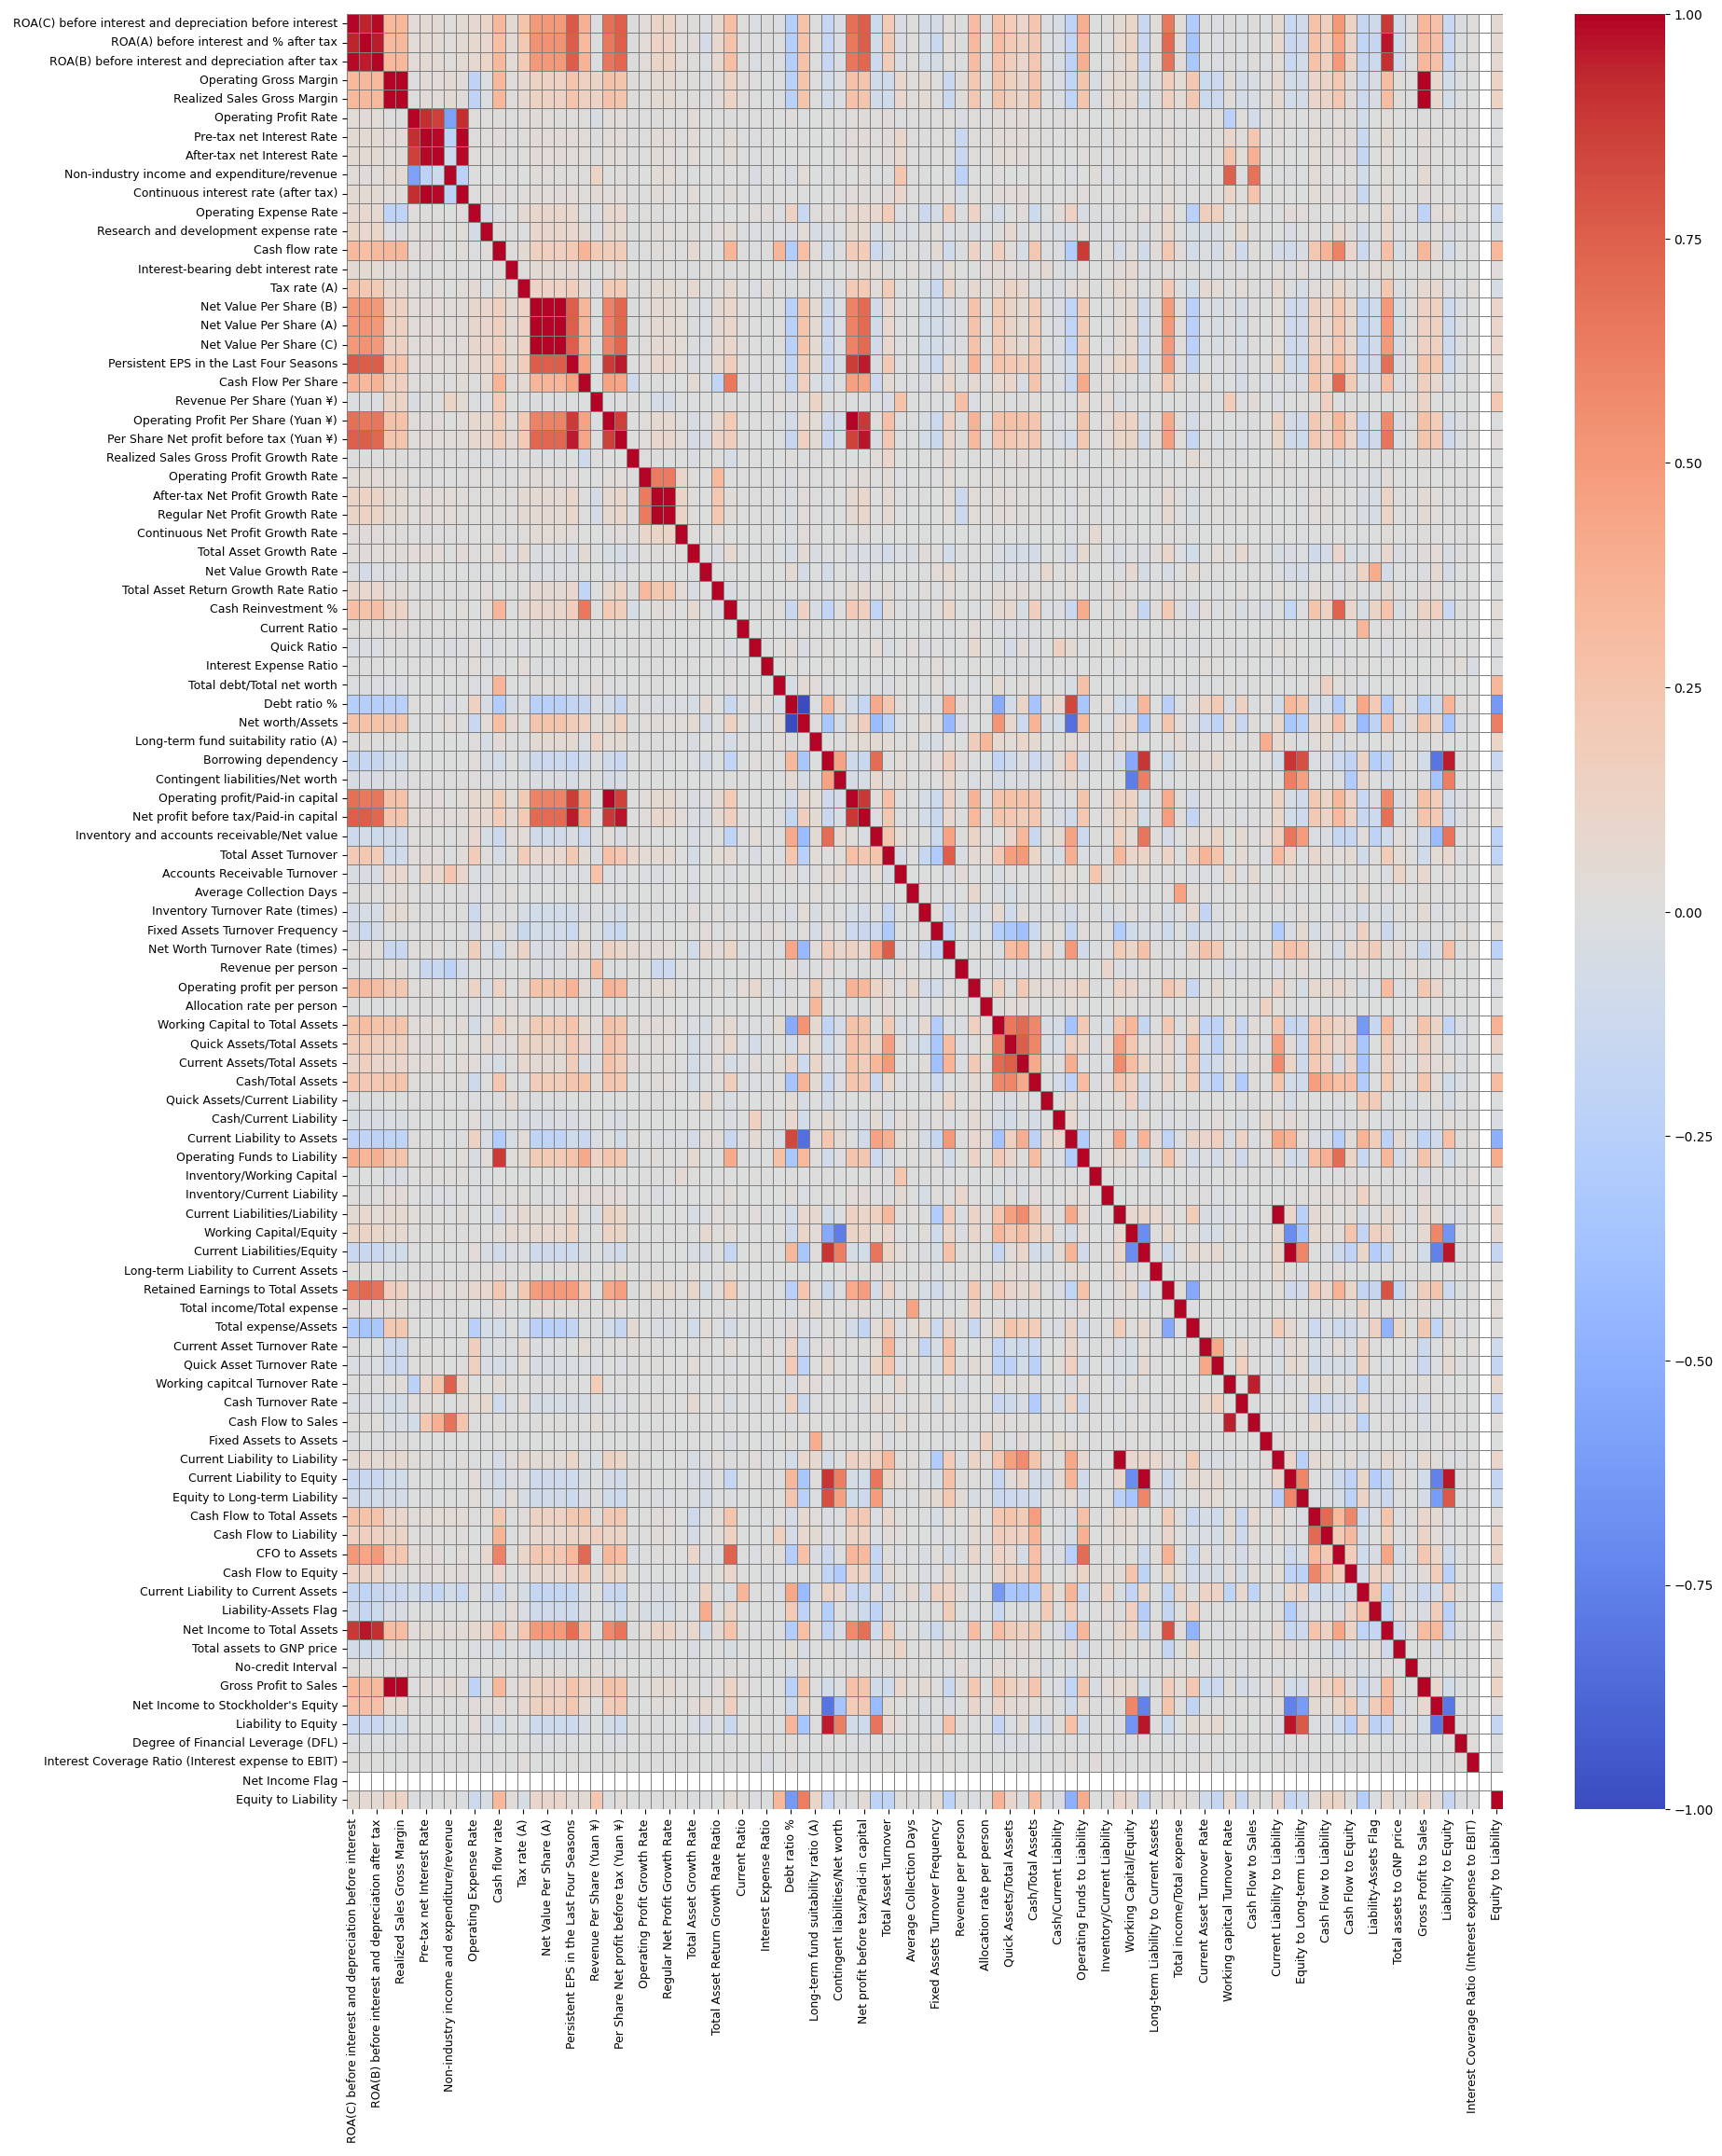

In [ ]:
def plot_correlation_heatmap(X):
  correlation_matrix = X.corr()
  plt.figure(figsize = (20,25))
  sns.heatmap(correlation_matrix, cmap = 'coolwarm',linewidths=0.5,linecolor='grey')
  plt.xticks(fontsize=9)
  plt.yticks(fontsize=9)
  plt.show()

plot_correlation_heatmap(X)

**HEATMAP OBSERVATION:** From above heatmap it is clearly visible that:

*   ROA(a), ROA(b) and ROA(c) are +ve correlated.
*   Net Value per Share (A,B and C) are highly correlated between each other.
*   After Tax Net Interest Rate and P re Tax Net Interest Rate are +ve  
    correlated.
*   Non-industry income and expenditure/revenue' is -ve correlated with
    Operating Profit Rate.
*   Operating Profit Growth Rate, After-tax Net Profit Growth Rate and
    Regular Net Profit Growth Rate are +ve correlated.
*   NPer Share Net profit before tax (Yuan ¬•) and Persistent EPS in the Last
    Four Seasons are highely correlated.

# DIMENSIONALITY REDUCTION OR FEATURE SELECTION

Since it is a very high dimensional data, we need to apply dimensionality reduction using PCA and other methods if possible



###PCA FOR DIMENSIONALITY REDUCTION

In [ ]:
def do_pca(X_features):
    pca = PCA().fit(X_features)
    plt.figure(figsize = (5,4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative sum - Explained Variance')
    #fitting PCA on our X
    pca = PCA(n_components=0.99).fit(X_features)
    print(f'Best value of n_component for 99% variance : {pca.n_components_}')

    pca = PCA(n_components=0.95).fit(X_features)
    print(f'Best value of n_component for 95% variance : {pca.n_components_}')

    pca = PCA(n_components=0.90).fit(X_features)
    print(f'Best value of n_component for 90% variance : {pca.n_components_}')

    pca = PCA(n_components=0.85).fit(X_features)
    print(f'Best value of n_component for 85% variance : {pca.n_components_}')

    pca = PCA(n_components=0.80).fit(X_features)
    print(f'Best value of n_component for 80% variance : {pca.n_components_}')
    print("\n")

###FEATURE SELECTION


We have also tried feature selection with random forest and SelecFromModel to give the top 20 features of the dataset

<ipython-input-31-4b88b6de1506>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'))


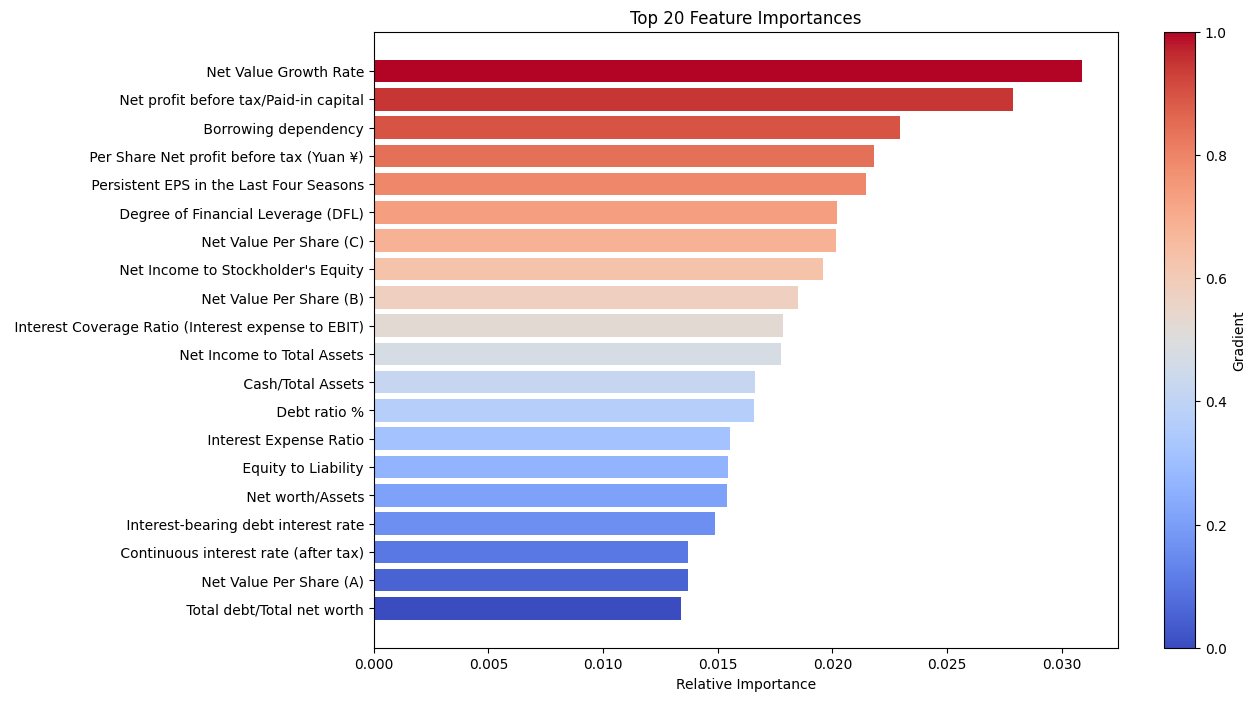

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X, np.ravel(y))

model_selector = SelectFromModel(model, prefit=True,threshold='median', max_features=20)
model_selector.fit(X, np.ravel(y))
X_selected = model_selector.transform(X)

selected_features = X.columns[model_selector.get_support()]

feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[-20:]  #Top 20 features

# Generate some random colors for demonstration purposes
colors = np.linspace(0, 1, len(indices))

plt.figure(figsize=(12, 8))
plt.title('Top 20 Feature Importances')

# Plot bar chart with gradient colors
bars = plt.barh(range(len(indices)), feature_importance[indices], color=plt.cm.coolwarm(colors), align='center')

# Set y-axis labels
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

# Add color bar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'))
cbar.set_label('Gradient')

plt.xlabel('Relative Importance')
plt.show()

###EXPLORE MOST RELEVANT FEATURE:

In [ ]:
X[' Net Value Growth Rate'].describe().apply("{0:,.0f}".format)

count            6,819
mean         1,566,212
std        114,159,390
min                  0
25%                  0
50%                  0
75%                  0
max      9,330,000,000
Name:  Net Value Growth Rate, dtype: object

#TRAINING AND TESTING DATA SPLITTING

We have split our 80% data into training set and 20% for testing, splitting is done with selected 11 features from PCA

In [ ]:
def split_data(X,y):
  print("\nDATA SPLITTING INTO TRAINING AND TESTING SETS\n")
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42 )
  plot_data_distribution(y_train,'Distribution of Bankruptcy Classes Before CI Solution',180)
  print("\n")
  return X_train, X_test, y_train, y_test

#MODELS HYPERPARAMETER TUNING

For each selected model, we want the best hyperparamters on which the F1 score is best, for that we have made a reusable function for all 5 classifers hyper tuning. These function will give me the best hyper params of the classifiers for out dataset. We will call these fucntion later in our code when we will be running a baseline execution of all models.

**How it works?**

For our classifier, we have made set of all possible params and execute them one by one and the params by which our dataset has high F1 score is selected to be the best params and returned by model.

### DECISION TREE CLASSIFIER TUNING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def decision_tree_tuning(X_train, y_train, X_test, y_test, max_depth=None, criterion=None, min_samples_split=None):
    # Setting default parameters if None are provided
    if max_depth is None:
        max_depth = [10,20,25,30,35,40,50]
    if criterion is None:
        criterion = ['gini', 'entropy', 'log_loss']
    if min_samples_split is None:
        min_samples_split = [10,20,30,40]

    best_params = {}
    best_f1 = 0

    # Iterating through all combinations of parameters
    for criteria in criterion:
        for depth in max_depth:
            for min_samples in min_samples_split:
                dt = DecisionTreeClassifier(max_depth=depth, criterion=criteria, min_samples_split=min_samples)
                dt.fit(X_train, y_train)
                y_pred = dt.predict(X_test)
                f1 = f1_score(y_test, y_pred, average='macro')

                # Update best parameters if current F1 score is higher
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {
                        'criterion': criteria,
                        'max_depth': depth,
                        'min_samples_split': min_samples
                    }

    return {'best_params': best_params, 'best_f1_score': best_f1}

### KNN CLASSIFIER TUNING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

def knn_tuning(X_train, y_train, X_test, y_test, n_neighbors=None, weights=None, metric=None):
    # Set default parameters if None are provided
    if n_neighbors is None:
        n_neighbors = [5,10,15,20,30,50,100,200]
    if weights is None:
        weights = ['uniform', 'distance']
    if metric is None:
        metric = ['euclidean', 'manhattan', 'minkowski']

    best_params = {}
    best_f1 = 0

    # Iterating through all combinations of parameters
    for neighbor in n_neighbors:
        for weight in weights:
            for m in metric:
                knn = KNeighborsClassifier(n_neighbors=neighbor, metric=m)
                knn.fit(X_train, np.ravel(y_train))
                y_pred = knn.predict(X_test)
                f1 = f1_score(y_test, y_pred, average='macro')

                # Update best parameters if current F1 score is higher
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {
                        'n_neighbors': neighbor,
                        'weights': weight,
                        'metric': m
                    }

    return {'best_params': best_params, 'best_f1_score': best_f1}

### RANDOM FOREST CLASSIFIER TUNING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def random_forest_tuning(X_train, y_train, X_test, y_test, n_estimators=None, criterion=None):
    if n_estimators is None:
        n_estimators = [5, 10, 15, 20, 30, 50, 100, 150, 200, 250, 300, 400, 500]
    if criterion is None:
        criterion = ['entropy', 'gini']

    best_params = {}
    best_f1 = 0
    best_model = None

    for c in criterion:
        for estimator in n_estimators:
            rf = RandomForestClassifier(n_estimators=estimator, criterion=c)
            rf.fit(X_train, np.ravel(y_train))
            y_pred = rf.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='macro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = {'n_estimators': estimator, 'criterion': c}
                best_model = rf

    return {'best_params': best_params, 'best_f1_score': best_f1}

###SVM CLASSIFIER TUNING

In [ ]:
def svm_tuning(X_train, y_train, X_test, y_test, C_values=None, kernels=None):
    if C_values is None:
        C_values = [10]
    if kernels is None:
        kernels = ['rbf']

    best_c = None
    best_kernel = None
    best_f1 = 0
    best_model = None

    # Iterate through all combinations of the specified parameters
    for C in C_values:
        for kernel in kernels:
            model = SVC(C=C, kernel=kernel, probability=True)
            model.fit(X_train, np.ravel(y_train))
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1 score

            # Update the best parameters if the current F1 score is higher
            if f1 > best_f1:
                best_f1 = f1
                best_c = C
                best_kernel = kernel
                best_model = model

    return {
        'best_params': {
            'C': best_c,
            'kernel': best_kernel
        },
        'best_f1_score': best_f1
    }

###GNBAYES CLASSIFIER TUNING

In [ ]:
def gn_bayes_tuning(X_train, y_train, X_test, y_test):
    # Initialize and train the Gaussian Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, np.ravel(y_train))

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate F1 score
    best_f1 = f1_score(y_test, y_pred, average='macro')

    return { 'best_params': { },'best_f1_score': best_f1}

#MODEL BUILDING WITH BEST HYPERPARAMETERS

Now here we will be getting best hyperparams for the models on which the we get best F1 scores as for for imbalanced dataset, precision and recall matters, whereas F1 score is the average of them.

In [ ]:
def model_tuning(X_train, y_train, X_test, y_test):
  print("\nMODEL HYPERPARAMETER TUNING\n")
  # Initialize hyperparameter tuning objects
  decision_tree_best_hyperparam=decision_tree_tuning(X_train, y_train, X_test, y_test)['best_params']
  knn_best_hyperparam=knn_tuning(X_train, y_train, X_test, y_test)['best_params']
  random_forest_best_hyperparam=random_forest_tuning(X_train, y_train, X_test, y_test)['best_params']
  svm_best_hyperparam=svm_tuning(X_train, y_train, X_test, y_test)['best_params']
  gnbayes_best_hyperparam=gn_bayes_tuning(X_train, y_train, X_test, y_test)['best_params'] # Gaussian Naive Bayes typically does not need hyperparameter tuning

  # Print best parameters (optional, for verification)
  print("Decision Tree Best Params:", decision_tree_best_hyperparam)
  print("\nKNN Best Params:", knn_best_hyperparam)
  print("\nRandom Forest Best Params:", random_forest_best_hyperparam)
  print("\nSVM Best Params:", svm_best_hyperparam)

  classifiers = {
    "Decision Tree": DecisionTreeClassifier(**decision_tree_best_hyperparam),
    "KNN": KNeighborsClassifier(**knn_best_hyperparam),
    "Random Forest": RandomForestClassifier(**random_forest_best_hyperparam),
    "SVM": SVC(**svm_best_hyperparam, probability=True), #prob true for ROC
    "Gaussian Naive Bayes": GaussianNB()  # Gaussian Naive Bayes typically does not need parameter tuning
  }
  print("\n")
  return classifiers

Above code will shows best hyperparams for all classiers in our dataset.
But remember, Guassian Naive Bayes doesn't support any hyperparam so it will be just executed simlply.

#BASELINE EXECUTION OF MODEL ON IMBALANCED DATA

Now we will be initializing the classifiers with best hyperparams.

Then we will be utilizing our reusable `evaluate_and_plot_classifiers` method to train our all 5 models and plot their results with confusion matrix and performance metrics (remember we will be having concern with precision and recall most in our imbalance class case)

In [ ]:
def evaluate_baseline_model(classifiers,X_train, y_train, X_test, y_test,title_suffix):
  print("\nBASELINE MODEL EVALUATION RESULTS\n")
  baseline_results_df = evaluate_and_plot_classifiers(classifiers,X_train,y_train,X_test,y_test,title_suffix="Baseline")
  baseline_model_evaluation_results_df = pd.DataFrame(baseline_results_df)
  print("\n")
  return baseline_model_evaluation_results_df

#CLASS BALANCING WITH RESAMPLING METHOD

As our performance metric are not overall good, we need to move forward with some class balancing solution, so first we will be trying SMOTE Resmapling Method. Let's get started.

###SMOTE RESAMPLING



In [ ]:
def smote_resampling(X_train, y_train):
  print("\nSMOTE RESAMPLING\n")
  smote = SMOTE(random_state=42)
  X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
  plot_data_distribution(y_train_smote,'Distribution of Bankruptcy Classes After SMOTE Resampling',90)
  print("\n")
  return X_train_smote, y_train_smote

SMOTE have done the class balancing by creating synthetic sampling of minority data.

### 1. SMOTE + PCA

In [ ]:
def smote_with_pca(X_train_smote):
  print("\nPRINCIPAL COMPOENENT ANALYSIS\n")
  do_pca(X_train_smote)
  print("\n")

def smote_pca_transform(X_train_smote,X_test):
  X_train_smote_PCA = PCA(11).fit_transform(X_train_smote)
  pca = PCA(n_components=11).fit(X_train_smote)
  X_test_PCA = pca.transform(X_test)
  return X_train_smote_PCA,X_test_PCA

Above results of PCA shows that 11 components are needed for the 99% variance in data. It can capture 99% of info in the dataset which can be acheive from top 11 features.


Now I have transform my smote X train features with PCA top 11 features, thus reducing the 95 features dimensionality reduction.

###MODELS EVALUTATION WITH CI SOLUTION SMOTE + PCA

Now we will use our `evaluate_and_plot_classifiers` method to train and evaluate the SMOTE model along with PCA dimensionality reduction.

In [ ]:
def evaluate_smote_with_pca(classifiers,X_train_smote_PCA, y_train_smote, X_test_PCA, y_test,title_suffix):
  print("\nSMOTE WITH PCA MODEL EVALUATION\n")
  smote_pca_results_df = evaluate_and_plot_classifiers(classifiers,X_train_smote_PCA, y_train_smote, X_test_PCA, y_test,title_suffix)
  smote_pca_model_evaluation_results_df = pd.DataFrame(smote_pca_results_df)
  print("\n")
  return smote_pca_model_evaluation_results_df

###MODELS EVALUTATION WITH CI SOLUTION SMOTE ONLY

Now we will use our `evaluate_and_plot_classifiers` method to train and evaluate the SMOTE model.

In [ ]:
def evaluate_smote(classifiers,X_train_smote, y_train_smote, X_test, y_test,title_suffix):
  print("\nSMOTE MODEL EVALUATION\n")
  smote_results_df = evaluate_and_plot_classifiers(classifiers,X_train_smote, y_train_smote, X_test, y_test,title_suffix)
  smote_model_evaluation_results_df = pd.DataFrame(smote_results_df)
  print("\n")
  return smote_model_evaluation_results_df

# ALGORITHMIC METHOD

### BAGGING

In [60]:
def evaluate_bagging_model(X_train, y_train, X_test, y_test,title_suffix):
  print("\nBAGGING MODEL EVALUATION RESULTS\n")
  bagging_results_df = evaluate_and_plot_bagging_classifiers(X_train,y_train,X_test,y_test)
  bagging_model_evaluation_results_df = pd.DataFrame([bagging_results_df])
  print("\n")
  return bagging_model_evaluation_results_df

Calling the bagging model reusable function in above code

### BOOSTING

In [61]:
def evaluate_boosting_model(X_train_smote, X_test, y_train_smote, y_test,title_suffix):
  print("\nBOOSTING MODEL EVALUATION RESULTS\n")
  boosting_results_df = evaluate_and_plot_boosting_classifiers(X_train_smote, X_test, y_train_smote, y_test)
  boosting_model_evaluation_results_df = pd.DataFrame([boosting_results_df])
  print("\n")
  return boosting_model_evaluation_results_df

# One Class Learning Method

### OneCLass SVM

In [ ]:
def evaluate_oneclass_svm_model(X_train, y_train, X_test, y_test,title_suffix):
  print("\nOne Class SVM MODEL EVALUATION RESULTS\n")
  oneclass_results_df = evaluate_and_plot_one_class_svm(X_train,y_train,X_test,y_test)
  oneclass_model_evaluation_results_df = pd.DataFrame([oneclass_results_df])
  print("\n")
  return oneclass_model_evaluation_results_df

Calling the OneClass SVM model reusable function in above code

# COMPARISON OF BASELINE AND SMOTE MODEL PERFORMANCE METRICS

In [ ]:
def compare_model_performance(baseline_model_evaluation_results_df, smote_model_evaluation_results_df, smote_pca_model_evaluation_results_df,bagging_model_evaluation_results_df,boosting_model_evaluation_results_df,oneclass_model_evaluation_results_df):
  print("\nCOMPARING MODEL PERFORMANCE\n")
  combined_df = pd.concat([baseline_model_evaluation_results_df, smote_model_evaluation_results_df, smote_pca_model_evaluation_results_df,bagging_model_evaluation_results_df,boosting_model_evaluation_results_df,oneclass_model_evaluation_results_df], ignore_index=True)
  table = combined_df.to_markdown(index=False)
  print(table)
  print("\n")

# AUC-ROC Curve

In [ ]:
def plot_roc_curve(classifiers,X_train_smote, y_train_smote,X_test,y_test):
  print("\nAUC ROC CURVE - MODEL WITH BEST AREA UNDER CURVE\n")
  plt.figure(figsize=(8, 6))  # Smaller than the original (10, 8)
  for name, clf in classifiers.items():
      # Train the model
      clf.fit(X_train_smote, np.ravel(y_train_smote))
      # Predict probabilities
      if hasattr(clf, "predict_proba"):
          y_probs = clf.predict_proba(X_test)[:, 1]
      else:  # Use decision function if predict_proba is not available
          y_probs = clf.decision_function(X_test)
      # Compute ROC curve and AUC
      fpr, tpr, _ = roc_curve(np.ravel(y_test), y_probs)
      roc_auc = auc(fpr, tpr)
      # Plot
      plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('AUC-ROC Curve (With Balanced Classes)')
  plt.legend(loc="lower right")
  plt.show()
  print("\n")

# ML PIPELINE

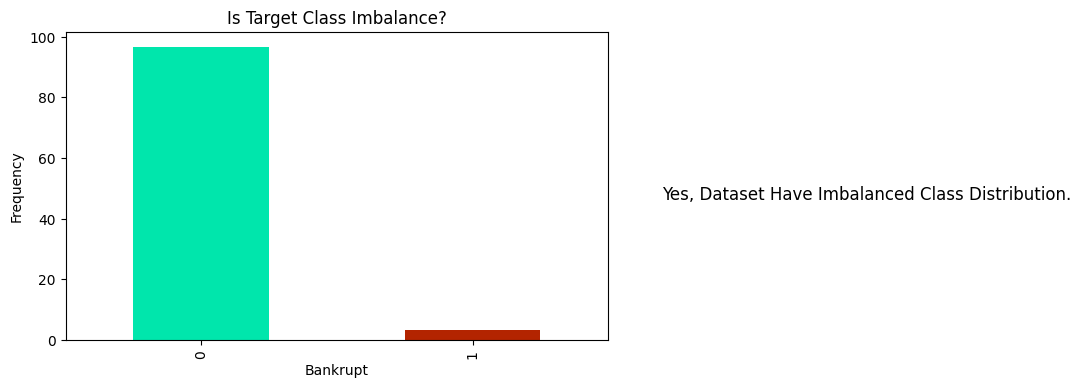




DATA SPLITTING INTO TRAINING AND TESTING SETS



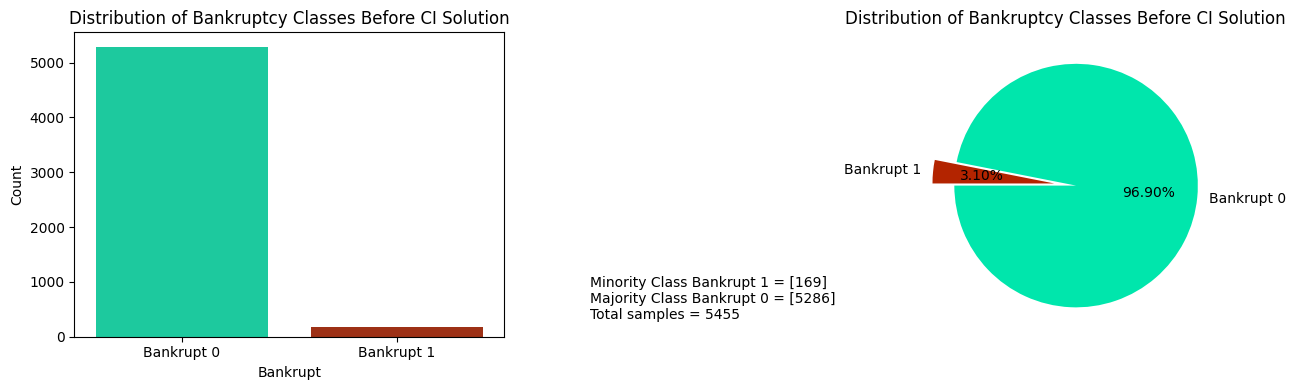




MODEL HYPERPARAMETER TUNING

Decision Tree Best Params: {'criterion': 'log_loss', 'max_depth': 40, 'min_samples_split': 10}

KNN Best Params: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}

Random Forest Best Params: {'n_estimators': 5, 'criterion': 'gini'}

SVM Best Params: {'C': 10, 'kernel': 'rbf'}



BASELINE MODEL EVALUATION RESULTS



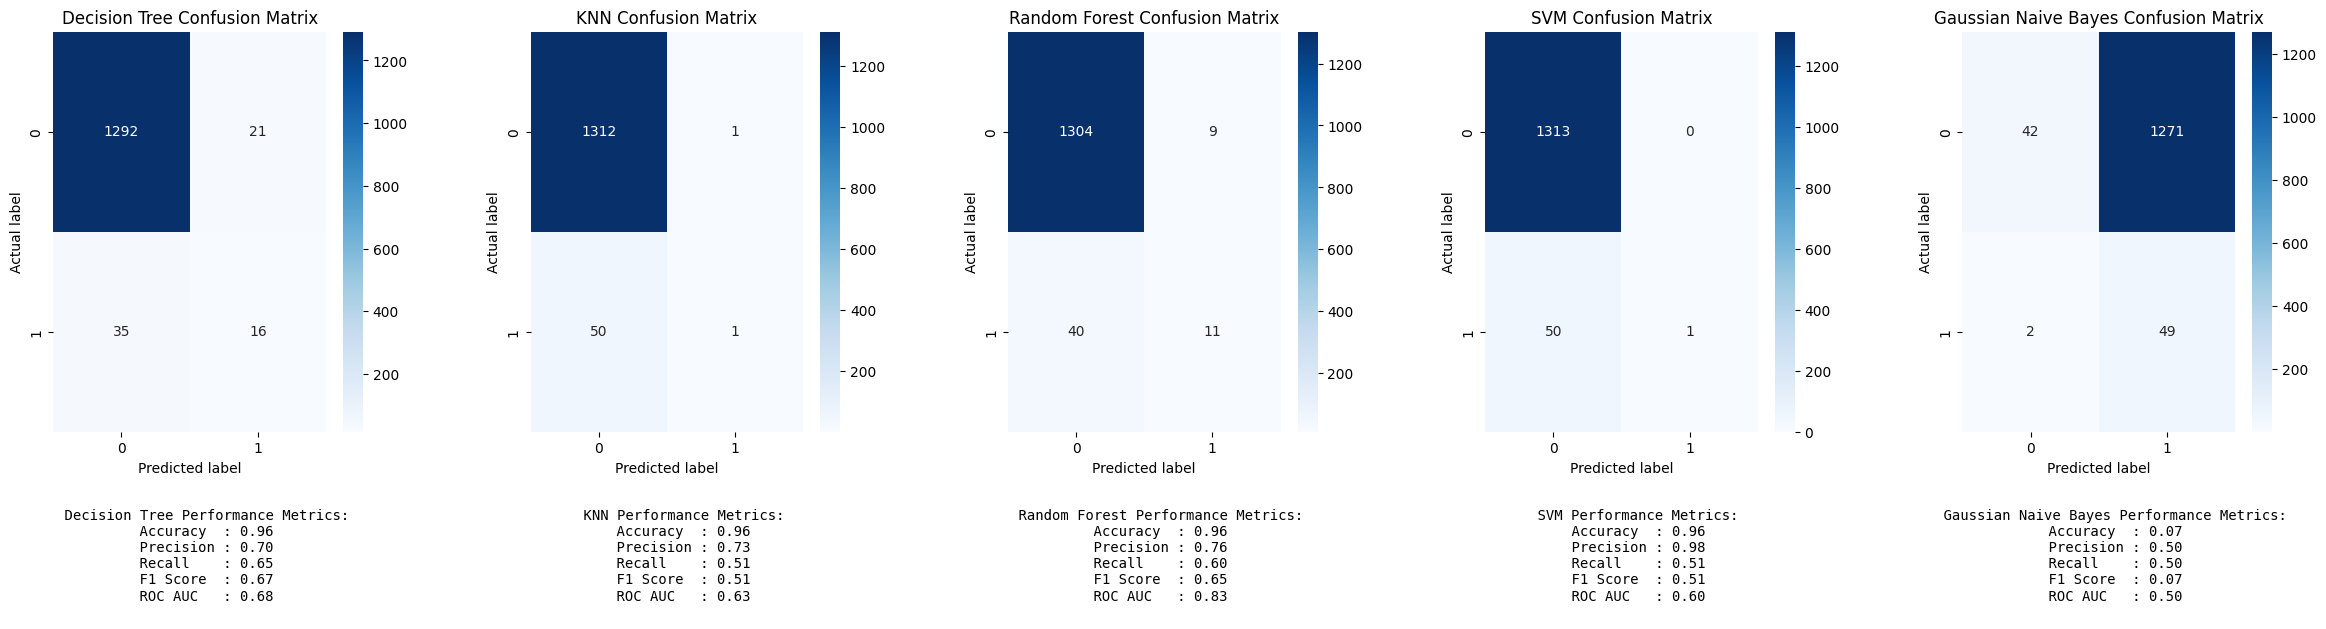




SMOTE RESAMPLING



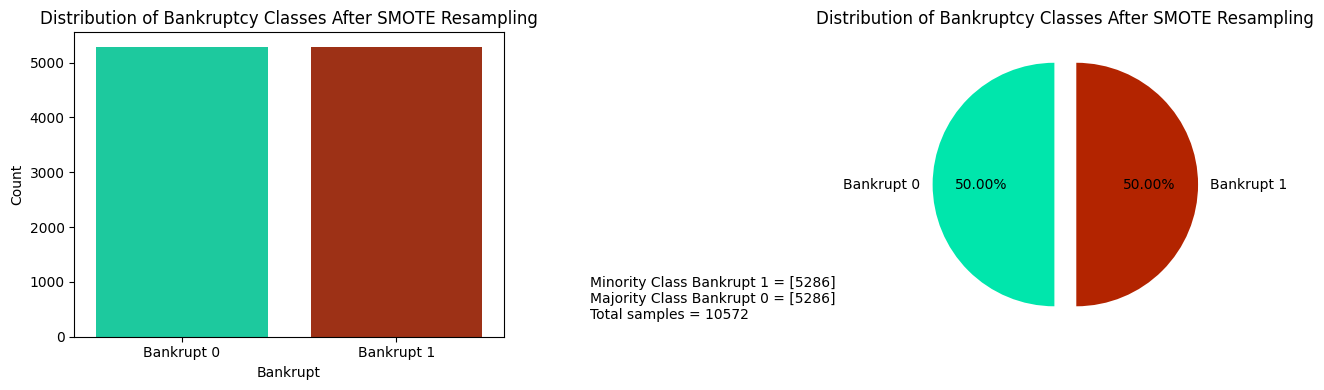




PRINCIPAL COMPOENENT ANALYSIS

Best value of n_component for 99% variance : 11
Best value of n_component for 95% variance : 8
Best value of n_component for 90% variance : 7
Best value of n_component for 85% variance : 7
Best value of n_component for 80% variance : 6





SMOTE WITH PCA MODEL EVALUATION



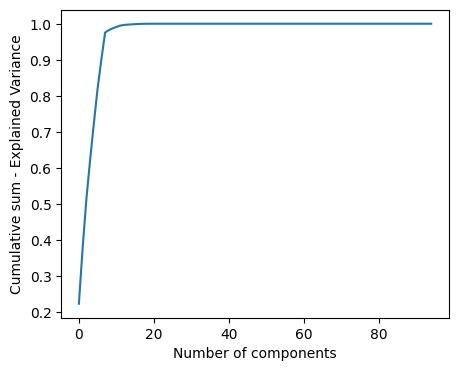

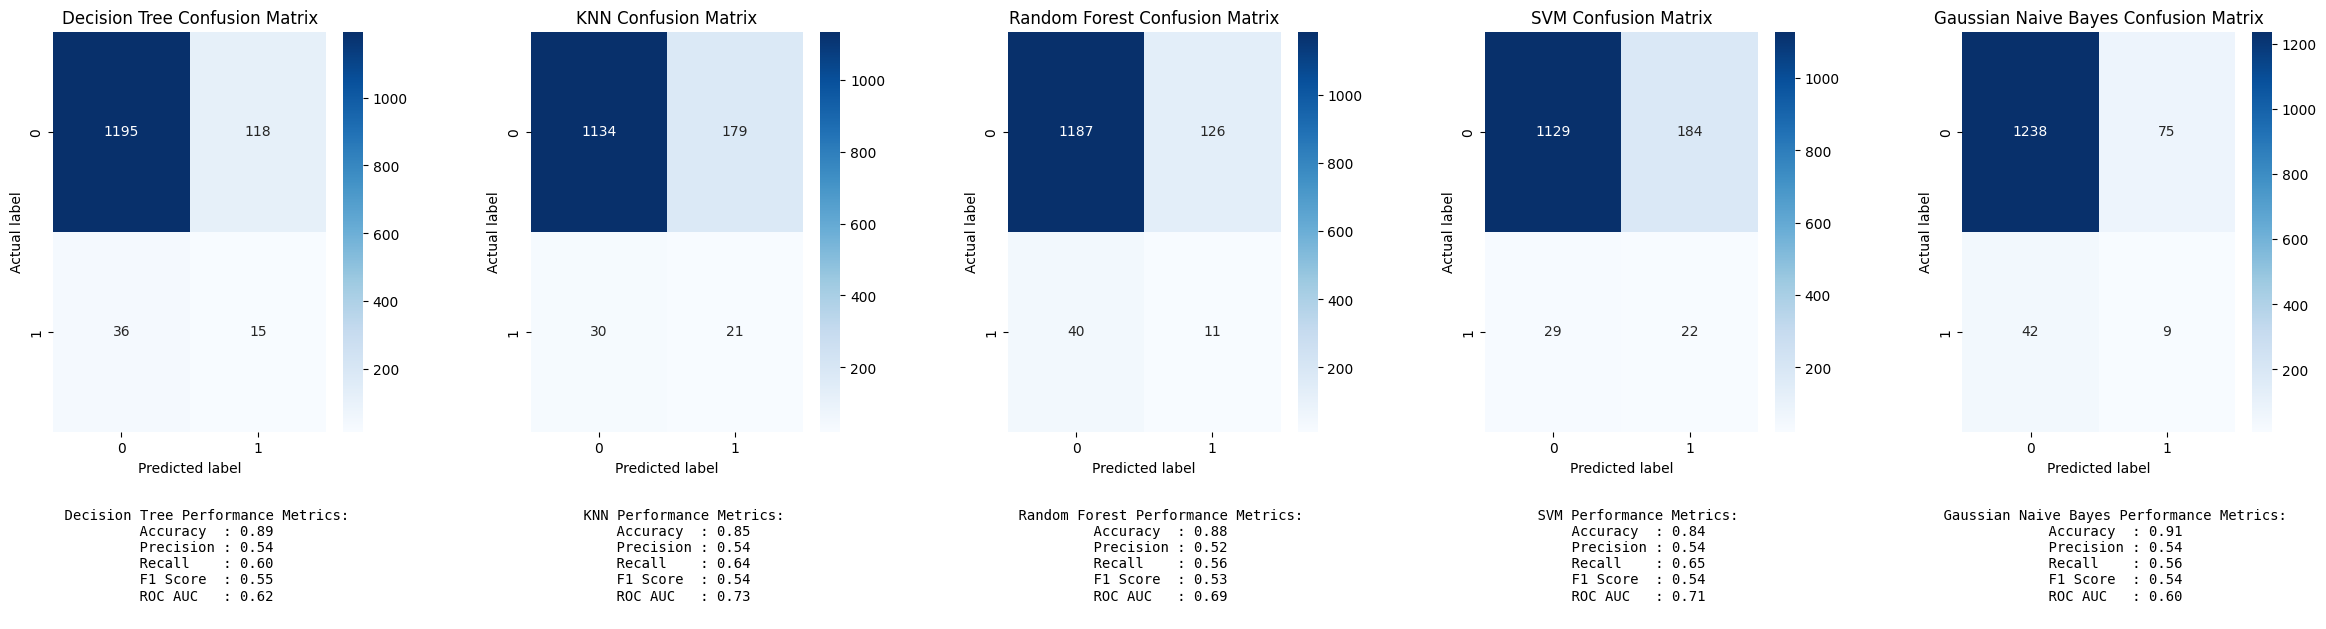




SMOTE MODEL EVALUATION



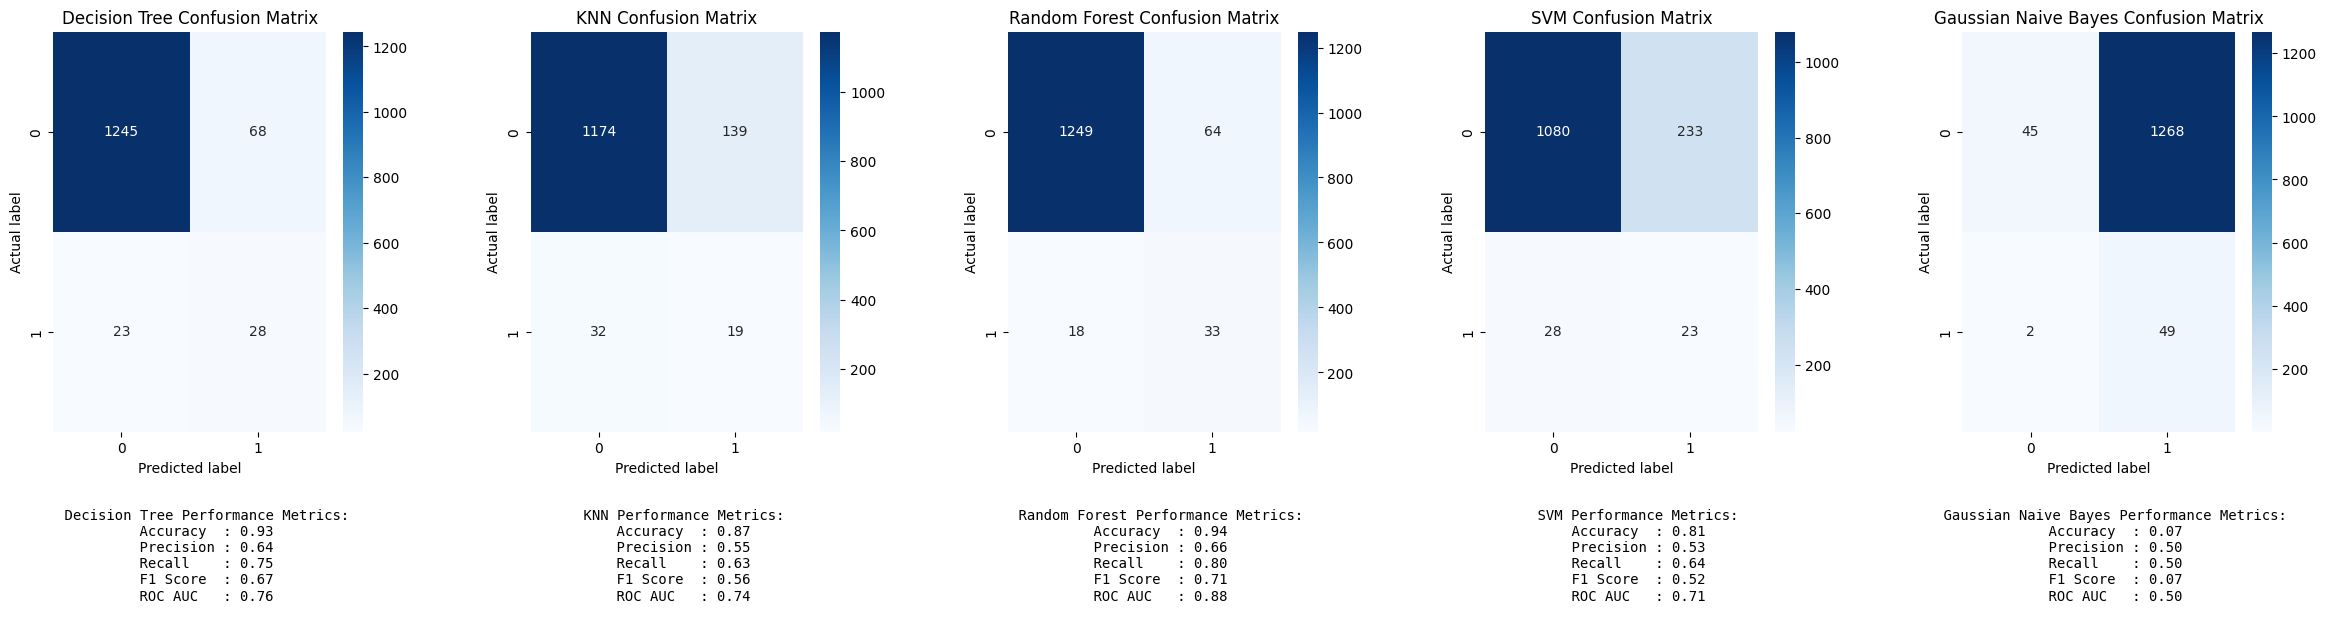




BAGGING MODEL EVALUATION RESULTS



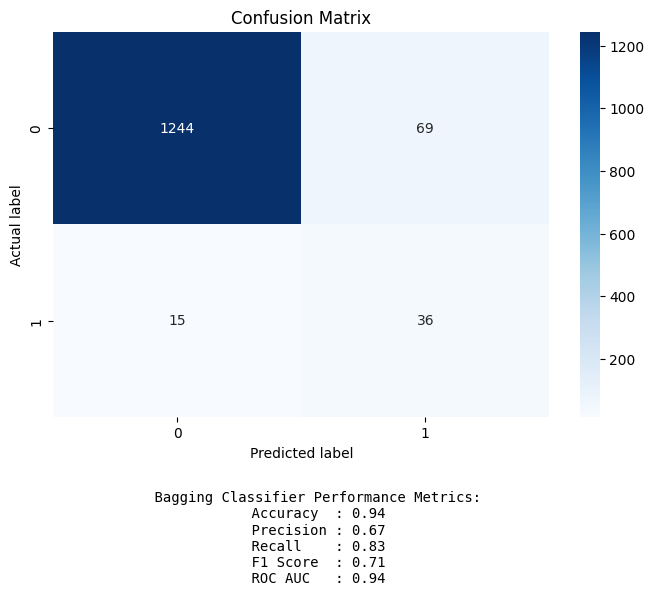




BOOSTING MODEL EVALUATION RESULTS



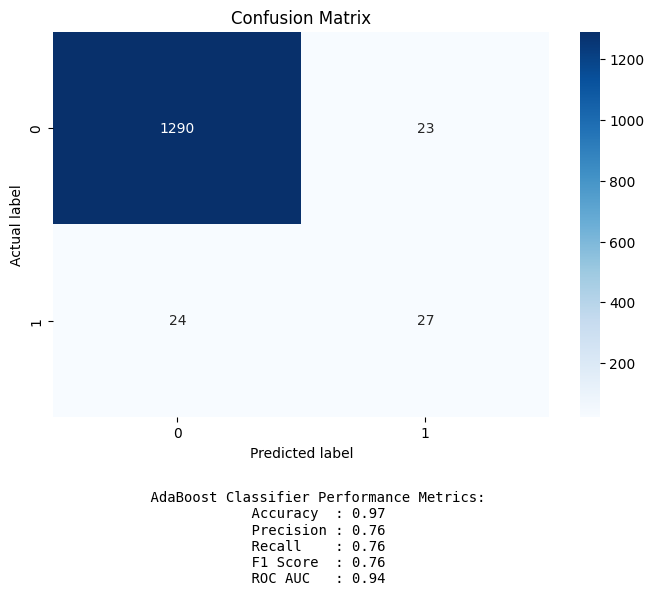




One Class SVM MODEL EVALUATION RESULTS



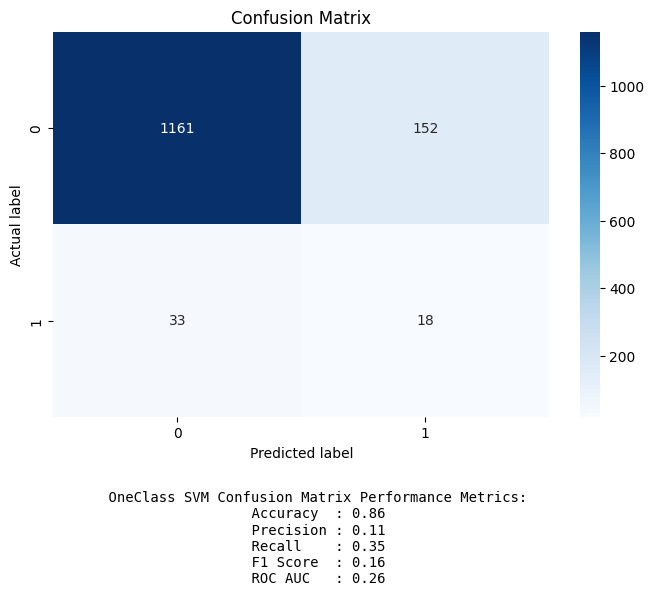




COMPARING MODEL PERFORMANCE

| Model Name                           |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
|:-------------------------------------|-----------:|------------:|---------:|-----------:|----------:|
| Baseline Decision Tree               |       0.96 |        0.7  |     0.65 |       0.67 |      0.68 |
| Baseline KNN                         |       0.96 |        0.73 |     0.51 |       0.51 |      0.63 |
| Baseline Random Forest               |       0.96 |        0.76 |     0.6  |       0.65 |      0.83 |
| Baseline SVM                         |       0.96 |        0.98 |     0.51 |       0.51 |      0.6  |
| Baseline Gaussian Naive Bayes        |       0.07 |        0.5  |     0.5  |       0.07 |      0.5  |
| (SMOTE) Decision Tree                |       0.93 |        0.64 |     0.75 |       0.67 |      0.76 |
| (SMOTE) KNN                          |       0.87 |        0.55 |     0.63 |       0.56 |      0.74 |
| (SMOTE) Random Forest         

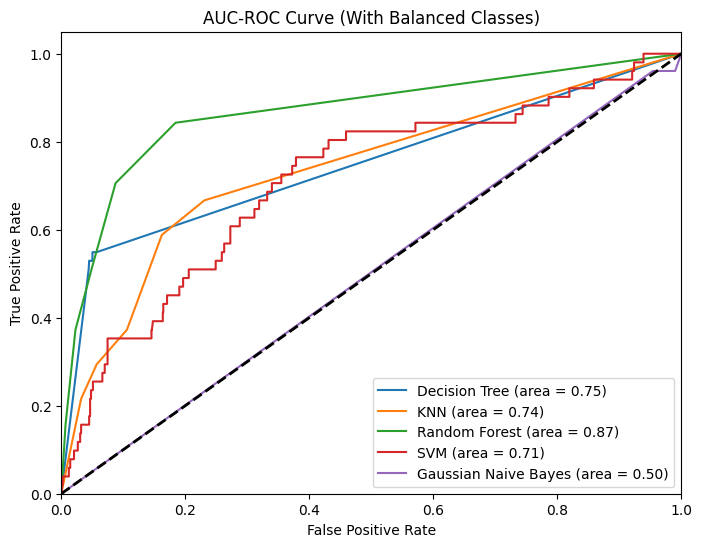

In [140]:
def ml_pipeline():
  check_imbalance(y['Bankrupt?'])
  #Splitting Data
  X_train, X_test, y_train, y_test= split_data(X,y)
  #Model HyperParameter Tuning
  classifiers = model_tuning(X_train, y_train, X_test, y_test)
  #Baseline Model Execution On Imbalanced Datasets
  baseline_model_evaluation_results_df = evaluate_baseline_model(classifiers,X_train,y_train,X_test,y_test,title_suffix="Baseline")
  #Smote Resampling
  X_train_smote, y_train_smote= smote_resampling(X_train,y_train)
  #Testing PCA Analysis
  smote_with_pca(X_train_smote)
  # X tranformation with Principal Components
  X_train_smote_PCA,X_test_PCA=smote_pca_transform(X_train_smote,X_test)
  #Resampling Model Execution On Balanced Datasets (SMOTE+PCA)
  smote_pca_model_evaluation_results_df = evaluate_smote_with_pca(classifiers,X_train_smote_PCA, y_train_smote, X_test_PCA, y_test,title_suffix="(SMOTE + PCA)")
  #Resampling Model Execution On Balanced Datasets (SMOTE)
  smote_model_evaluation_results_df = evaluate_smote(classifiers,X_train_smote, y_train_smote, X_test, y_test,title_suffix="(SMOTE)")
  #Bagging Model Execution
  bagging_model_evaluation_results_df = evaluate_bagging_model(X_train, y_train, X_test, y_test,title_suffix="Bagging")
  #Boosting Model Execution
  boosting_model_evaluation_results_df = evaluate_boosting_model(X_train_smote, X_test, y_train_smote, y_test,title_suffix="Boosting")
  #OneClass SVM Model Execution
  oneclass_model_evaluation_results_df = evaluate_oneclass_svm_model(X_train, y_train, X_test, y_test,title_suffix="OneClass SVM")
  #Comparison of Model Performance
  compare_model_performance(baseline_model_evaluation_results_df, smote_model_evaluation_results_df, smote_pca_model_evaluation_results_df,bagging_model_evaluation_results_df,boosting_model_evaluation_results_df,oneclass_model_evaluation_results_df)
  #ROC Curve
  plot_roc_curve(classifiers,X_train_smote, y_train_smote,X_test,y_test)

ml_pipeline()

#FINAL OBSERVATION:

---
### BASELINE MODELS:
---

üü™ **ACCURACY**:

From above analysis we can show the overall HIGH ACCURACY of all the models, but here high accuracy metric is not true as it captures the false negative cases.

üü™ **PRECISION AND RECALL:**

When it comes to Precision and Recall, SVM dominates the other models with 0.98 Precision means it has low rate of false positive prediction, but when it comes to recall its moderate thus SVM have misses almost majority of positive cases.
It can be seen that baseline Random Forest has maintain a good balance between precison and recall.

‚úÖ **BEST PERFORMING MODEL:**

Random Forest Classifier shows a very good performance of accuracy, precision and recall than other models with accuracy (0.96), precision (0.77) and recall (0.63).

‚ùå **POOR PERFORMING MODEL:**

Guassian Naive Bayes shows a very poor performance of accuracy, precision and recall which indicates it might not be good model to use for imbalance dataset initially.

---
### RESAMPLING WITH SMOTE:
---

üü™ **ACCURACY**:

There is a slight decrease in accuracy after we done the oversampling and make the dataset balance with class. This decrease in accuracy predicted chances of recovering from the overfitting which we faced in Baseline model accuracies.

üü™ **PRECISION AND RECALL:**

The precison and recall for model execution after SMOTE shows the increase in recall that shows that the minority class is better recognized by oversampling.
Decison Tree and Random Forest have performed best after SMOTE.

‚úÖ **BEST PERFORMING MODEL:**

Random Forest Classifier shows a very good performance of accuracy, precision and recall than other models with accuracy (0.94), precision (0.66) and recall (0.78).

‚ùå **POOR PERFORMING MODEL:**

Guassian Naive Bayes shows a very poor performance of accuracy, precision and recall again even after SMOTE resampling which indicates it might not be good model to use for imbalance dataset after resampling and with all feature set.


---
### RESAMPLING WITH SMOTE + PCA:
---

Its good to check our model with feature selection as well as to remove the correlated features or select the feature only which gives us high variance in maximum.

üü™ **ACCURACY**:

AFter PCA, the SMOTE values decreases the accuracy of the majority models except Guassian Naive Bayes, whose accuracy increased from 0.07 to 0.91 which is a huge increase. But overall PCA have decreased the model accuracy suggesting that there might be a loss of information.

üü™ **PRECISION AND RECALL:**

The precison and recall for model execution after SMOTE and PCA also shows the decrease as comapre to Baseline and simple SMOTE inidicates the PCA might make our model less computationally complex and stabilize the variance but it compromises on model sensitivity.

‚úÖ **BEST PERFORMING MODEL:**

Guassian Naive Bayes shows a very good performance of accuracy, precision and recall than other models with accuracy (0.91), precision (0.54) and recall (0.56). But we will not consider these results as the accurate one due to our initial 2 approaches of finding best models.

‚ùå **POOR PERFORMING MODEL:**

Decision Tree, KNN, Random Forest, SVM all perform quite low in case of PCA.


---
### BAGGING WITH RANDOM FOREST:
---

Bagging Classifier shows the best results in terms of precision (0.67), recall (0.83) ad area under curve (0.94) which tells the ability to separate from positve and negative classes that ultimately gives excellent performance as compare to all previous models.


---
### BOOSTING WITH DECISION TREES ADABOOST:
---

For boosting, adaboost classifer with weak decison tree learning perform well with f1-score (0.76) which shows the approximately good results for predicitng true positive and false posiitves. The area under curve (0.94) which tells the ability to separate from positve and negative classes that ultimately gives excellent performance as compare to all previous models and same like bagging algorithm.

---
### One Class SVM:
---

OneClass SVM predicts the performance metrics of outlier/anamoly class "Bankruptcy" whihc is quite low as compare to other class. As a matter of bankruptcy recall matters most which is low in our case of only 35% which is quite critical as it had not correctly classified the actual bankrupt companies as bankrupted. The f1-score and roc (0.26) is also very low indicates that the model just randomly guesses for the outliers class (i.e. Bankrupt=1)

---
### CONCLUSION:
---

‚úÖ**RANDOM FOREST CLASSIFER** is the BEST choice of model so far if we are not using bagging and boosting models, as its   
    accuracy (0.94), precision (0.66) and recall (0.78) is quite consistent and reliable for such Bankruptcy Predictions.

‚ú® It minimizes the False Negative (i.e. accurately predicted bankrupt companies as bankrupt) with HIGH RECALL than any other model.

‚ú® It maximizes the True Positive and minimizes the False Positive with HIGH PRECISION than any other model.

‚úÖ**BAGGING AND BOOSTING MODELS: (ENSEMBLE METHODS)**

But when you are considering bagging or boosting model, you can go with any as they both perform equally well in predicting the bankruptcy cases even more than simple random forest classifer.



